In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [154]:
car_1= pd.read_csv('delhi_car.csv')       #we load the webscraping data 

In [155]:
car_2= pd.read_csv('other_car.csv')

In [145]:
car_1.head()

,car_name,distanced,fuel,type,price,body
0,2018 Renault Captur,"15,769 kms",Petrol,Manual,7.59 Lakh,suv
1,2021 Tata Nexon,"34,960 kms",Diesel,Automatic,12.17 Lakh,suv
2,2016 Hyundai Creta,"42,940 kms",Petrol,Manual,9.21 Lakh,suv
3,2018 Honda WR-V,"30,135 kms",Petrol,Manual,7.87 Lakh,suv
4,2021 Tata Nexon,"15,277 kms",Petrol,Manual,10.38 Lakh,suv


In [158]:


car_2.head()

,car_name,distanced,fuel,type,price,body
0,2017 Jeep Compass,"58,463 kms",Diesel,Manual,12.30 Lakh,SUV
1,2015 Mahindra XUV500,"90,281 kms",Diesel,Manual,8.20 Lakh,SUV
2,2017 Renault Duster,"31,525 kms",Petrol,Automatic,7.53 Lakh,SUV
3,2019 Jeep Compass,"15,414 kms",Diesel,Manual,15.78 Lakh,SUV
4,2018 Renault Duster,"33,139 kms",Petrol,Automatic,7.11 Lakh,SUV


In [159]:


print(car_1.shape)
print(car_2.shape)

(2760, 6)
(2599, 6)


In [160]:

car_data = pd.concat([car_1, car_2], axis=0, ignore_index=True)

In [162]:
car_data.tail()

,car_name,distanced,fuel,type,price,body
5354,2012 Fiat Linea,"75,000 kms",Diesel,Manual,2.80 Lakh,Sedan
5355,2016 Maruti Swift Dzire,"1,10,000 kms",Diesel,Manual,4.84 Lakh,Sedan
5356,2013 BMW 7 Series,"45,700 kms",Diesel,Automatic,31.00 Lakh,Sedan
5357,2013 Volkswagen Vento,"55,000 kms",Diesel,Automatic,5.00 Lakh,Sedan
5358,2019 Toyota Yaris,"10,000 kms",Petrol,Automatic,9.25 Lakh,Sedan


In [163]:

year=[]
for i in car_data['car_name']:
#    print(i.split()[0])
    year.append(i.split()[0])

In [164]:
car_brand = []
for i in car_data['car_name']:

    if 'Land' and 'Rover' not in i:
        car_brand.append(i.split()[1])
    if 'Land' and 'Rover' in i:
        car_brand.append('-'.join(i.split()[1:3]))

In [165]:

model=[]
for n in car_data['car_name']:

    if len(n.split()[2:])>=1 and 'Land' and 'Rover' not in n:
        model.append('-'.join(n.split()[2:]))
    if len(n.split()[3:])>=1 and 'Land' and 'Rover' in n:
        model.append('-'.join(n.split()[3:]))

In [166]:

car_data['model']= model
car_data['year'] = year
car_data['car_brand'] = car_brand

In [168]:

car_data.head()

,car_name,distanced,fuel,type,price,body,model,year,car_brand
0,2018 Renault Captur,"15,769 kms",Petrol,Manual,7.59 Lakh,suv,Captur,2018,Renault
1,2021 Tata Nexon,"34,960 kms",Diesel,Automatic,12.17 Lakh,suv,Nexon,2021,Tata
2,2016 Hyundai Creta,"42,940 kms",Petrol,Manual,9.21 Lakh,suv,Creta,2016,Hyundai
3,2018 Honda WR-V,"30,135 kms",Petrol,Manual,7.87 Lakh,suv,WR-V,2018,Honda
4,2021 Tata Nexon,"15,277 kms",Petrol,Manual,10.38 Lakh,suv,Nexon,2021,Tata


In [203]:

car_data[car_data['model']=='Ghost']   # we have to changed the price(crore) value into lakh 

,car_name,distanced,fuel,type,price,body,model,year,car_brand
4578,2010 Rolls-Royce Ghost,"28,000 kms",Petrol,Automatic,1.80 Cr,Sedan,Ghost,2010,Rolls-Royce


In [205]:
price= []
for n in car_data['price'].str.split():
    if 'Lakh' in n:
        price.append(n[0])
    if len(n)==1 :
        price.append(n[0])
    if 'Cr' in n :
        price.append(float(n[0])*100)

In [206]:
car_data['price']= price

In [207]:
car_data[car_data['model']=='Ghost']    # price which value in crore converrt into lakh  

,car_name,distanced,fuel,type,price,body,model,year,car_brand
4578,2010 Rolls-Royce Ghost,"28,000 kms",Petrol,Automatic,180.0,Sedan,Ghost,2010,Rolls-Royce


In [211]:
kilometer= []
for i in car_data['distanced']:         # 
#    print(i.split()[0])
    kilometer.append(i.split()[0])
len(kilometer)

5359

In [213]:
car_data['kilometer']= kilometer

In [216]:
### we removed ' , ' from kilometer column  , 
km= []
for i in car_data['kilometer'].str.split(','):
    if len(i)>=2:
        km.append(i[0]+i[1])
    if len(i)==1:
        km.append(i[0])

In [218]:
car_data['kilometer']= km

In [219]:
car_data.head()

,car_name,distanced,fuel,type,price,body,model,year,car_brand,kilometer
0,2018 Renault Captur,"15,769 kms",Petrol,Manual,7.59,suv,Captur,2018,Renault,15769
1,2021 Tata Nexon,"34,960 kms",Diesel,Automatic,12.17,suv,Nexon,2021,Tata,34960
2,2016 Hyundai Creta,"42,940 kms",Petrol,Manual,9.21,suv,Creta,2016,Hyundai,42940
3,2018 Honda WR-V,"30,135 kms",Petrol,Manual,7.87,suv,WR-V,2018,Honda,30135
4,2021 Tata Nexon,"15,277 kms",Petrol,Manual,10.38,suv,Nexon,2021,Tata,15277


In [ ]:
#  we done all the data cleaning part 

In [220]:
car_data.isnull().sum()

car_name     0
distanced    0
fuel         0
type         0
price        0
body         0
model        0
year         0
car_brand    0
kilometer    0
dtype: int64

In [221]:
#car_data.to_csv('car_price_data.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car_price_data.csv')

In [3]:

df.head()

,car_name,distanced,fuel,type,price,body,model,year,car_brand,kilometer
0,2018 Renault Captur,"15,769 kms",Petrol,Manual,7.59,suv,Captur,2018,Renault,15769.0
1,2021 Tata Nexon,"34,960 kms",Diesel,Automatic,12.17,suv,Nexon,2021,Tata,34960.0
2,2016 Hyundai Creta,"42,940 kms",Petrol,Manual,9.21,suv,Creta,2016,Hyundai,42940.0
3,2018 Honda WR-V,"30,135 kms",Petrol,Manual,7.87,suv,WR-V,2018,Honda,30135.0
4,2021 Tata Nexon,"15,277 kms",Petrol,Manual,10.38,suv,Nexon,2021,Tata,15277.0


In [4]:


#  change the column name

df.rename(columns={'price':'price_in_lakh'}, inplace=True)

In [49]:
#  

df.drop(['car_name','distanced'], axis=1, inplace=True)

In [5]:
#  lets check the shape of dataset
df.shape

(5315, 10)

In [6]:
# checking null value
df.isnull().sum()              # no any null value is in dataset

car_name         0
distanced        0
fuel             0
type             0
price_in_lakh    0
body             0
model            0
year             0
car_brand        0
kilometer        0
dtype: int64

In [10]:
# brief summary about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fuel           5315 non-null   object 
 1   type           5315 non-null   object 
 2   price_in_lakh  5315 non-null   float64
 3   body           5315 non-null   object 
 4   model          5315 non-null   object 
 5   year           5315 non-null   int64  
 6   car_brand      5315 non-null   object 
 7   kilometer      5315 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 332.3+ KB


In [7]:
## Statistical description
df.describe()

,price_in_lakh,year,kilometer
count,5315.000000,5315.000000,5315.000000
mean,11.987936,2015.872437,45020.962747
std,14.034702,3.517993,26719.263644
min,1.000000,1996.000000,100.000000
25%,4.490000,2014.000000,23995.000000
50%,7.350000,2016.000000,45854.000000
75%,13.900000,2018.000000,67000.000000
max,180.000000,2022.000000,99839.000000


In [13]:
df[df['price_in_lakh']>=100].shape

#  only 18 rows in this dataset have car price greater than 100  

(18, 10)

In [14]:
## COUNTING THE VALUE OF CATEGORICAL COLUMNS 

df['fuel'].value_counts()

Petrol      3036
Diesel      2149
CNG          118
Electric       7
LPG            5
Name: fuel, dtype: int64

In [15]:
df['type'].value_counts()

Manual       3372
Automatic    1943
Name: type, dtype: int64

In [16]:
df['body'].value_counts()

#  in 'body ' variable we have to  change name of some value,  
#  sedan & Sedan ,suv & SUV  these are same type

Sedan        1061
SUV           953
HatchBack     924
sedan         858
suv           799
Hatchback     565
MUV           155
Name: body, dtype: int64

In [17]:

df['body'].replace({'sedan':'Sedan','Hatchback':'HatchBack','suv':'SUV'},inplace=True)

In [18]:
#
df['body'].value_counts()

Sedan        1919
SUV          1752
HatchBack    1489
MUV           155
Name: body, dtype: int64

In [19]:
# 
df['model'].value_counts()  # 257 different types of values in 'model' variables

City                  343
Creta                 194
i20                   192
Verna                 156
Swift-Dzire           151
                     ... 
Land-Cruiser-Prado      1
Yeti                    1
Grand-Vitara            1
ZS-EV                   1
S60-Cross-Country       1
Name: model, Length: 257, dtype: int64

In [22]:
# lets check how many brand of car have in this Vriable

df['car_brand'].value_counts()   ## 31 different type car brand 

Maruti           1055
Hyundai           967
Honda             640
Mahindra          360
Mercedes-Benz     301
Toyota            294
BMW               210
Audi              180
Volkswagen        172
Tata              170
Ford              163
Renault           158
Skoda             129
Kia               101
MG                 79
Jeep               76
Land-Rover         49
Jaguar             46
Nissan             38
Chevrolet          33
Volvo              20
Fiat               15
Mitsubishi         15
Datsun             15
Mini               14
Porsche             9
Isuzu               2
Bentley             1
Maserati            1
Bajaj               1
Rolls-Royce         1
Name: car_brand, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

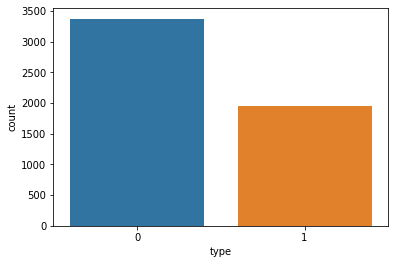

In [42]:
#

#PLOTTING COUNTPLOT
sns.countplot(df['type'])
#  0 =  manual 
#  1 =  automatic

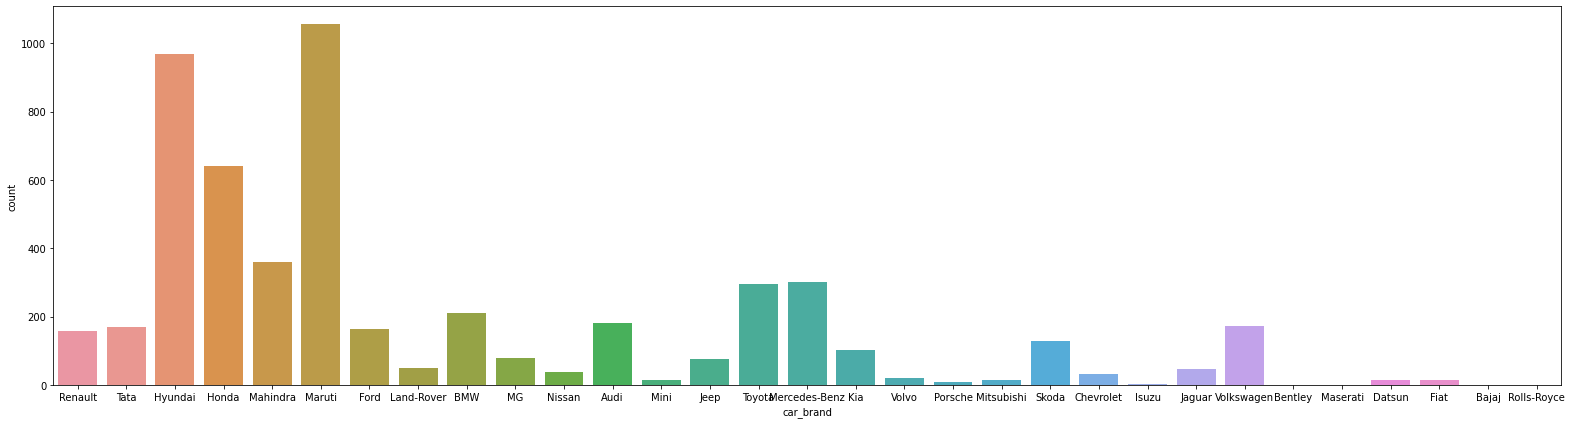

In [28]:

plt.figure(figsize=(22,6))
sns.countplot(df['car_brand'], )
plt.tight_layout()

# (Maserati, Bentley, Rolls-Royce,'Bajaj','Isuzu') these car brand have only one value in this dataset

<AxesSubplot:xlabel='car_brand'>

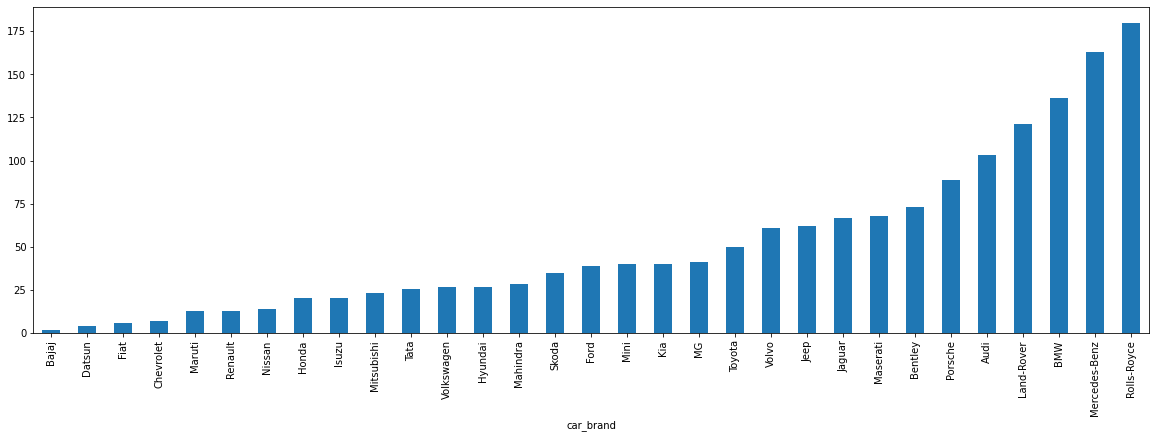

In [42]:
# lets check which car brand has highest price
df.groupby(['car_brand'])['price_in_lakh'].max().sort_values().plot(kind='bar', figsize=(20,6))

# according this plot we can change these all values into numerical type

<AxesSubplot:xlabel='car_brand,model'>

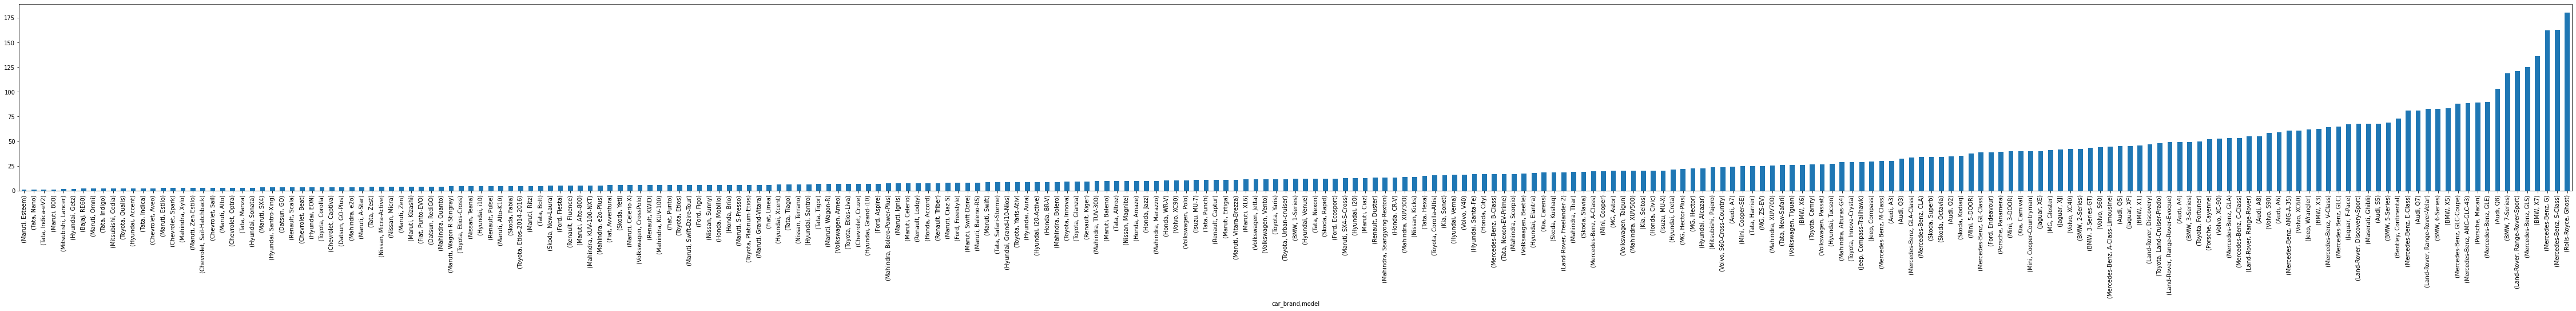

In [36]:

# lets check according car model which car brand  has highest price 
df.groupby(['car_brand','model'])['price_in_lakh'].max().sort_values().plot(kind='bar', figsize=(80,6))

#   highest car brand price = Rolls-Royce Ghost, Mercedes-Benz S-Class, Mercedes-Benz G , BMW X7

#  lowest car brand price= Bajaj, Datsun, Chevrolet, Fiat

In [31]:
##  which model of car has the maximum number of times 

df.groupby(['model'])['price_in_lakh'].count().sort_values(ascending=False)


model
City           343
Creta          194
i20            192
Verna          156
Swift-Dzire    151
              ... 
Q2               1
Punto-EVO        1
Aura             1
XC-90            1
Avventura        1
Name: price_in_lakh, Length: 257, dtype: int64

In [32]:
##
vm=['Bajaj','Datsun','Fiat','Chevrolet','Maruti','Renault','Nissan','Honda','Isuzu','Mitsubishi','Tata','Volkswagen','Hyundai','Mahindra','Skoda',
            'Ford','Mini','Kia','MG','Toyota','Volvo','Jeep','Jaguar','Maserati','Bentley','Porsche','Audi','Land-Rover','BMW','Mercedes-Benz','Rolls-Royce']

In [33]:
#  value of 'car_brand' variable convert into numerical form according to maximum car price 
p= 1
for w in vm:
    if p <= 31 :
        df['car_brand'].replace({w:p}, inplace=True)
        p+=1

<AxesSubplot:xlabel='car_brand'>

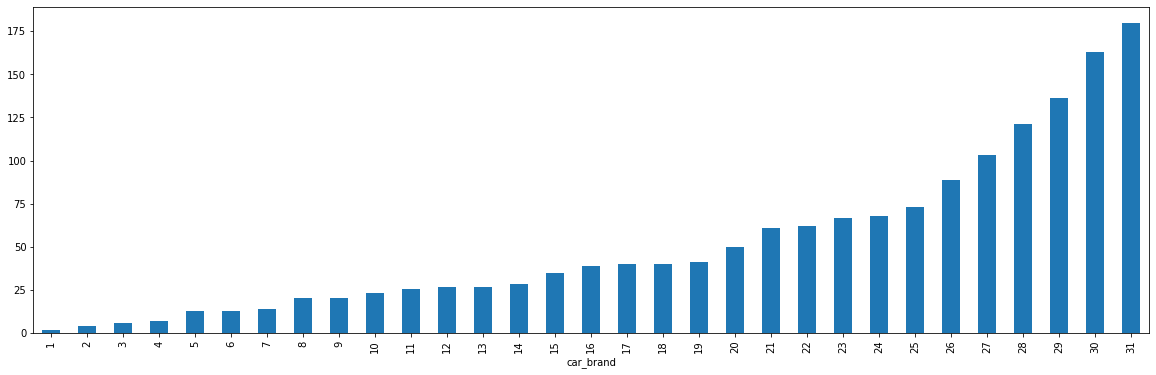

In [35]:
## The name of the car has been changed in she way that as the price of car is increasing the value of the name of car is also
##     increasing   ,  it will be easy to predict the price
## 

df.groupby(['car_brand'])['price_in_lakh'].max().sort_values().plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='year', ylabel='price_in_lakh'>

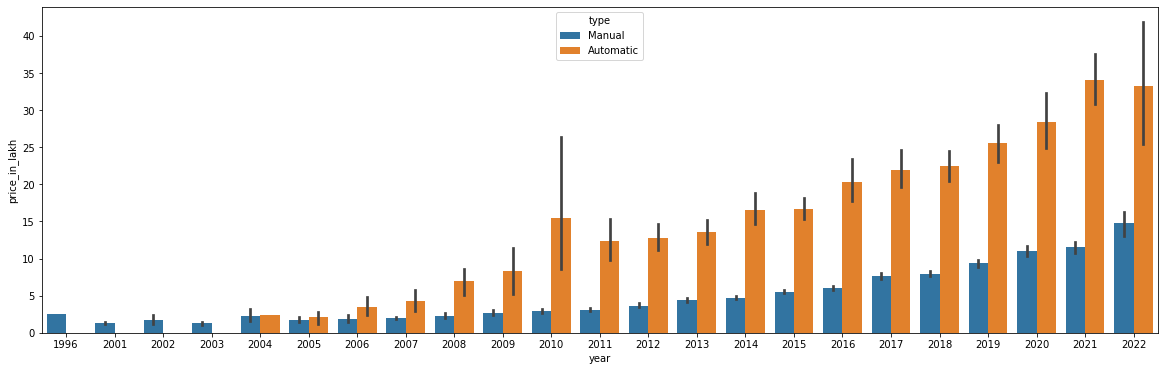

In [77]:
##  plotting barplot to find in which year car cost more

plt.figure(figsize=(20,6))
sns.barplot(df['year'],df['price_in_lakh'],hue=df['type'])

<AxesSubplot:xlabel='car_brand', ylabel='price_in_lakh'>

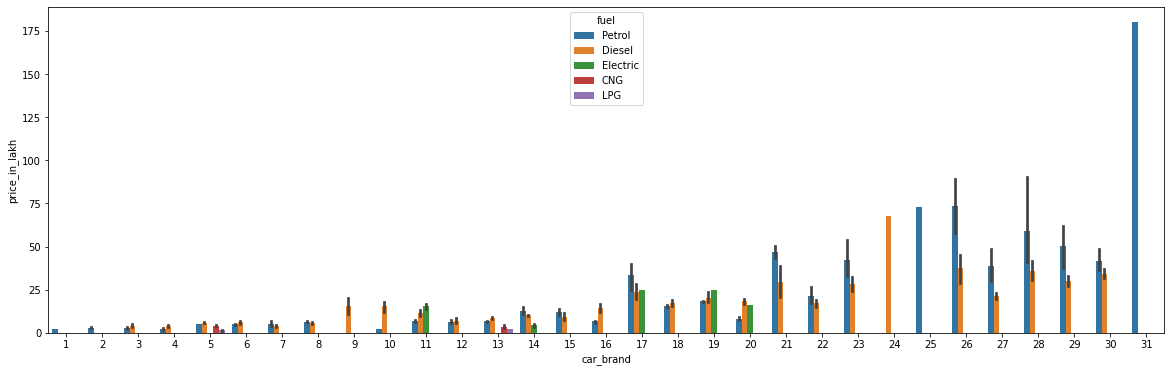

In [36]:
##
plt.figure(figsize=(20,6))
sns.barplot(df['car_brand'],df['price_in_lakh'],hue=df['fuel'])

## we can see in this plot that petrol car has maximum price

<AxesSubplot:xlabel='car_brand', ylabel='price_in_lakh'>

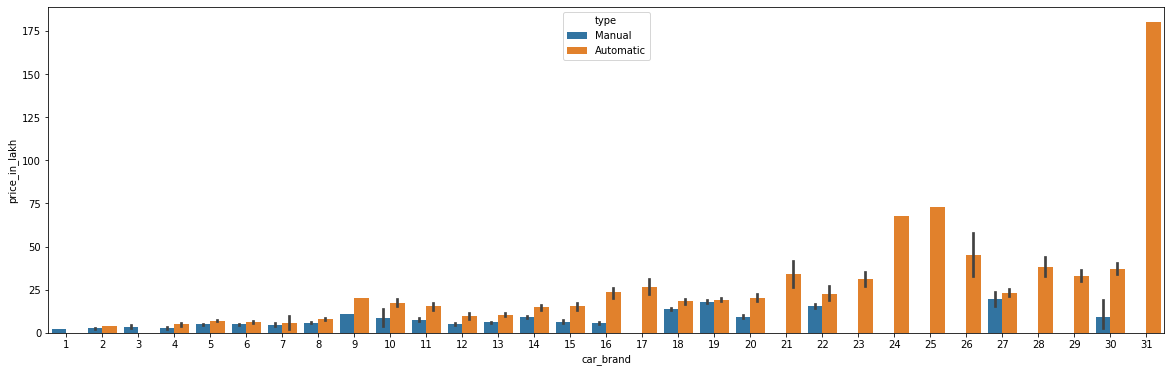

In [37]:

##
plt.figure(figsize=(20,6))
sns.barplot(df['car_brand'],df['price_in_lakh'],hue=df['type'])

##  maximum price of Automatic type car_brand  compare to Manual type 

In [38]:
# change the categorical variables values into numerical form

df['fuel'].replace({'LPG':0,'CNG':1,'Electric':2,'Diesel':3,'Petrol':4}, inplace=True)
df['type'].replace({'Automatic':1,'Manual':0,}, inplace=True)

<AxesSubplot:>

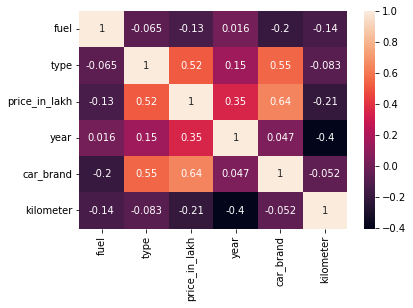

In [39]:
# plotting  correlation of dataset
sns.heatmap(df.corr(), annot=True)

## car_brand, type, year these variables are positive correlated with car price

<AxesSubplot:xlabel='price_in_lakh', ylabel='kilometer'>

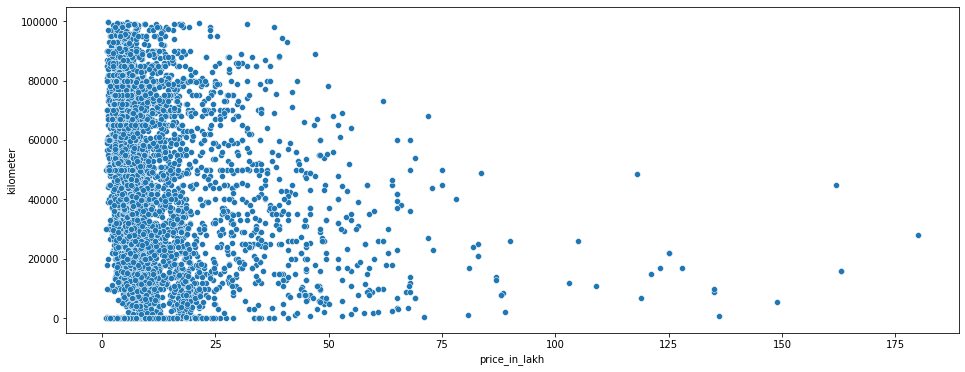

In [45]:

plt.figure(figsize=(16,6))
sns.scatterplot(df['price_in_lakh'], df['kilometer'])
#   16 car has  greater than 100 lakh(1 cr) price  out 5315 car

In [ ]:


#  PLOTTING DISTRIBUTION PLOT

<AxesSubplot:xlabel='price_in_lakh', ylabel='Density'>

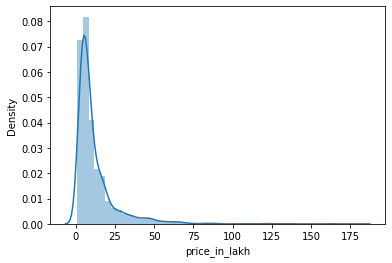

In [41]:
# plotting distribution plot  of car-price 

sns.distplot(df['price_in_lakh'])
# very few car's price have more than 75

<AxesSubplot:xlabel='kilometer', ylabel='Density'>

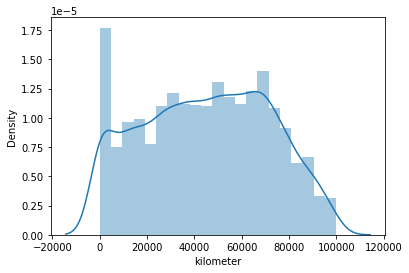

In [46]:
# 
sns.distplot(df['kilometer'])

In [50]:
df.head()

,fuel,type,price_in_lakh,body,model,year,car_brand,kilometer
0,4,0,7.59,SUV,Captur,2018,6,15769.0
1,3,1,12.17,SUV,Nexon,2021,11,34960.0
2,4,0,9.21,SUV,Creta,2016,13,42940.0
3,4,0,7.87,SUV,WR-V,2018,8,30135.0
4,4,0,10.38,SUV,Nexon,2021,11,15277.0


In [47]:
# CHECKING  SHKEWNESS OVER CONTINUOUS VARIABLES  

df[['kilometer']].skew()  ## in this dataset only  one input variables is continuous type

kilometer   -0.016171
dtype: float64

In [51]:
# we use get_dummies method on car 'model' categorical variable
# then we get r2_score of model is very minimum, not performed well

df1= pd.get_dummies(df)

In [52]:
df1.shape

(5315, 267)

In [53]:

x= df1.drop('price_in_lakh', axis=1)
y= df1.price_in_lakh

In [54]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [57]:
scaler= StandardScaler()
scaled= scaler.fit_transform(x)
scaled= pd.DataFrame( scaled, columns= x.columns)

In [60]:
##  lINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 54,test_size=0.30,)

lr= LinearRegression()
lr.fit(x_train, y_train)
pred= lr.predict(x_test)
print('r2_score=',r2_score(y_test, pred))
print('mean_squared_erro=', mean_squared_error(y_test, pred))
print('mean_absolute_error=', mean_absolute_error(y_test, pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, pred)))


r2_score= -1.0916054959988988e+27
mean_squared_erro= 2.068385809053203e+29
mean_absolute_error= 39028492149870.86
root_mean_squared_erro= 454795097714696.44


In [61]:


##                                            SVM REGRESSOR
from sklearn.svm import SVR
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 59,test_size=0.30,)

svm = SVR()
svm.fit(x_train, y_train)
pred= svm.predict(x_test)
print('r2_score=',r2_score(y_test, pred))
print('mean_squared_erro=', mean_squared_error(y_test, pred))
print('mean_absolute_error=', mean_absolute_error(y_test, pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, pred)))

r2_score= 0.37895283684857994
mean_squared_erro= 113.51923074667174
mean_absolute_error= 4.0531348590880105
root_mean_squared_erro= 10.6545403817655


In [62]:
##   RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 53,test_size=0.30,)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred= rf.predict(x_test)
print('r2_score=',r2_score(y_test, pred))
print('mean_squared_erro=', mean_squared_error(y_test, pred))
print('mean_absolute_error=', mean_absolute_error(y_test, pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, pred)))

r2_score= 0.8370999416828095
mean_squared_erro= 31.399389709740742
mean_absolute_error= 1.6686275384634524
root_mean_squared_erro= 5.603515834700634


In [63]:
df.head()

,fuel,type,price_in_lakh,body,model,year,car_brand,kilometer
0,4,0,7.59,SUV,Captur,2018,6,15769.0
1,3,1,12.17,SUV,Nexon,2021,11,34960.0
2,4,0,9.21,SUV,Creta,2016,13,42940.0
3,4,0,7.87,SUV,WR-V,2018,8,30135.0
4,4,0,10.38,SUV,Nexon,2021,11,15277.0


In [69]:

df2= df.copy()

In [76]:
##  apply pandas get_dummies on categorical value and after build linear-regression model then we get very minimum r2_score

## so we used Label-Encoding over two categorical variables then get r2_score = 56

from sklearn.preprocessing import LabelEncoder

for col in df2.select_dtypes(include='object'):
    le=LabelEncoder()
    d2=le.fit_transform(df2[col]) 
    df2[col]=d2
    
    
x2= df2.drop('price_in_lakh', axis=1)
y2= df2['price_in_lakh']

scaler1 = StandardScaler()
scaled1 = scaler1.fit_transform(x2)
scaled1 = pd.DataFrame( scaled1, columns= x2.columns)

In [71]:
x2.head(3)

,fuel,type,body,model,year,car_brand,kilometer
0,4,0,2,50,2018,6,15769.0
1,3,1,2,150,2021,11,34960.0
2,4,0,2,69,2016,13,42940.0


In [74]:
x2.isnull().sum()

fuel         0
type         0
body         0
model        0
year         0
car_brand    0
kilometer    0
dtype: int64

In [78]:

##                                            LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(scaled1, y2,random_state = 59,test_size=0.30,)

LR = LinearRegression()
LR.fit(x_train, y_train)
LR_pred= LR.predict(x_test)
print('r2_score=',r2_score(y_test, LR_pred))
print('mean_squared_erro=', mean_squared_error(y_test, LR_pred))
print('mean_absolute_error=', mean_absolute_error(y_test, LR_pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, LR_pred)))

r2_score= 0.5770635878066761
mean_squared_erro= 77.3071982541808
mean_absolute_error= 5.390186208620437
root_mean_squared_erro= 8.792451208518635


In [82]:
##                                            SVM REGRESSOR
from sklearn.svm import SVR
x_train,x_test,y_train,y_test=train_test_split(scaled1, y2,random_state = 59,test_size=0.30,)

svm = SVR()
svm.fit(x_train, y_train)
svm_pred= svm.predict(x_test)
print('r2_score=',r2_score(y_test, svm_pred))
print('mean_squared_erro=', mean_squared_error(y_test, svm_pred))
print('mean_absolute_error=', mean_absolute_error(y_test, svm_pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, svm_pred)))

r2_score= 0.7021917594661647
mean_squared_erro= 54.43541872709295
mean_absolute_error= 3.141706384707371
root_mean_squared_erro= 7.378036237854417


In [83]:


##                                           KNN REGRESSOR
from sklearn.neighbors import KNeighborsRegressor
x_train,x_test,y_train,y_test=train_test_split(scaled1, y2,random_state = 59,test_size=0.30,)

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_pred= knn.predict(x_test)
print('r2_score=',r2_score(y_test, knn_pred))
print('mean_squared_erro=', mean_squared_error(y_test, knn_pred))
print('mean_absolute_error=', mean_absolute_error(y_test, knn_pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, knn_pred)))

r2_score= 0.8095226224204533
mean_squared_erro= 34.81675251159874
mean_absolute_error= 2.6322733542319745
root_mean_squared_erro= 5.900572218996963


<AxesSubplot:xlabel='price_in_lakh'>

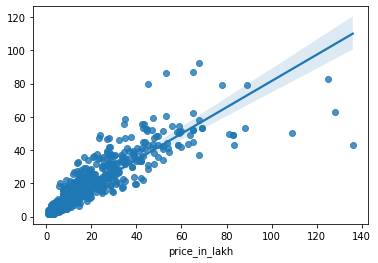

In [84]:
## PLOTTING REGPLOT  OF ( y_test and predicted_value ) with KNN model
sns.regplot(y_test, knn.predict(x_test))

In [85]:

##                                           RANDOMFOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(scaled1, y2,random_state = 59,test_size=0.30,)

RF = RandomForestRegressor()
RF.fit(x_train, y_train)
RF_pred= RF.predict(x_test)
print('r2_score=',r2_score(y_test, RF_pred))
print('mean_squared_erro=', mean_squared_error(y_test, RF_pred))
print('mean_absolute_error=', mean_absolute_error(y_test, RF_pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, RF_pred)))

r2_score= 0.9145610754153911
mean_squared_erro= 15.617108603236561
mean_absolute_error= 1.884420336176363
root_mean_squared_erro= 3.951848757636932


<AxesSubplot:xlabel='price_in_lakh'>

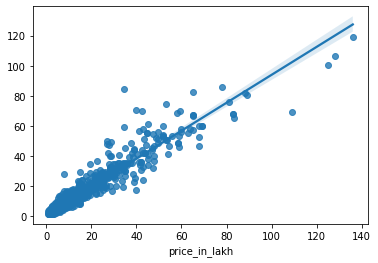

In [86]:

## PLOTTING REGPLOT  OF ( y_test and predicted_value ) with RandomForest model

sns.regplot(y_test, RF.predict(x_test))

In [120]:
from sklearn.linear_model import RidgeCV

rcv= RidgeCV(alphas= np.arange(0.001,0.2,0.01), normalize=True,)
rcv.fit(x_train, y_train)
alpha=rcv.alpha_

In [125]:

from sklearn.linear_model import Ridge
ridge= Ridge(alpha= alpha)
ridge.fit(x_train, y_train)

r_pred= ridge.predict(x_test)
print('r2_score=',r2_score(y_test, r_pred))
print('mean_squared_erro=', mean_squared_error(y_test, r_pred))
print('mean_absolute_error=', mean_absolute_error(y_test, r_pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, r_pred)))

r2_score= 0.577063587960078
mean_squared_erro= 77.30719822614098
mean_absolute_error= 5.390185599792566
root_mean_squared_erro= 8.792451206924095


In [ ]:
## let's apply cross_validation

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold= KFold(n_splits=12, shuffle=True, random_state=59)


In [131]:
## CROSS_VALIDATION WITH  RANDOMFOREST
(cross_val_score(RF, x_train,y_train, cv=kfold)).mean()

0.8351589435684749

In [132]:
## CROSS_VALIDATION WITH  KNN
(cross_val_score(knn, x_train,y_train, cv=kfold)).mean()

0.7484786199784838

In [133]:

## CROSS_VALIDATION WITH  SVR
(cross_val_score(svm, x_train,y_train, cv=kfold)).mean()

0.6438795840367649

In [139]:
#  HYPERPARAMATER TUNING                   '''' RANDOMFOREST-REGRESSOR''''
from sklearn.model_selection import GridSearchCV

x_train, x_test,y_train,y_test= train_test_split(scaled1,y2, test_size=0.30, random_state= 59)
param= {'n_estimators':[100,180, 280],'max_depth':[11,14,17,19] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
gcv = GridSearchCV(RF ,param, cv=kfold,n_jobs=-1)

gcv.fit(x_train,y_train)
print('best_parameter=', gcv.best_params_ ,'\n')




best_parameter= {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 280} 



In [141]:

x_train, x_test,y_train,y_test= train_test_split(scaled1,y2, test_size=0.30, random_state= 59)

G_RF= RandomForestRegressor(n_estimators=280,max_depth=14,oob_score=True)
G_RF.fit(x_train, y_train)
y_pred = G_RF.predict(x_test)

print('r2_score=',r2_score(y_test, y_pred))
print('mean_squared_erro=', mean_squared_error(y_test, y_pred))
print('mean_absolute_error=', mean_absolute_error(y_test, y_pred))
print('root_mean_squared_erro=', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score= 0.9146266648354252
mean_squared_erro= 15.605119722280065
mean_absolute_error= 1.882045344043932
root_mean_squared_erro= 3.950331596496687


In [149]:
import pickle

car_price = 'car_price.pickle'

pickle.dump(G_RF,open(car_price, 'wb'))
